In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data_path = "D:/projects dataset/zomato.csv"
from pandas import read_csv

In [4]:
df= pd.read_csv(data_path)

# Results
print({df.shape})
df.head()

{(51717, 17)}


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
import numpy as np
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [9]:
data = df.copy()

In [10]:
data.groupby(["name", "address"]).agg({"listed_in(type)" : list})

listed_in(type)
name                                         address                                                                                              
#FeelTheROLL                                 Opposite Mantri Commercio, Outer Ring Road, Dev...                               [Delivery, Delivery]
#L-81 Cafe                                   Sector 6, HSR Layout, HSR                           [Delivery, Dine-out, Delivery, Dine-out, Deliv...
#Vibes Restro                                Marasur Gate, Chandapura - Anekal Road, Near Al...                       [Buffet, Delivery, Dine-out]
#refuel                                      7, Ground Floor, RR Commercial Complex, Akshay ...                        [Cafes, Delivery, Dine-out]
'Brahmins' Thatte Idli                       19, 1st main, 2nd cross, 3rd stage, 3rd block, ...                                         [Dine-out]
...                                                                                                                                            ...
nu.tree                                      47/7 First floor, DoddaThogur Road, Near Velank...                                         [Delivery]
                                             Ground Floor-Lobby Area, Brigade IRV Centre, Na...                     [Delivery, Delivery, Delivery]
re:cess - Hilton Bangalore Embassy GolfLinks Hilton Bangalore Embassy GolfLinks, Embassy Gol...                [Dine-out, Dine-out, Pubs and bars]
repEAT Hub                                   67/4, Bhoganahalli Road, JCR Layout, Panathur, ...                               [Delivery, Dine-out]
sCoolMeal                                    197/293-3, 32nd Main, 1st Stage, BTM, Bangalore     [Delivery, Delivery, Delivery, Delivery, Deliv...

[12499 rows x 1 columns]

In [11]:
grouped=data.groupby(["name", "address"]).agg({"listed_in(type)" : list})

In [12]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
newdata = pd.merge(grouped, data, on = (["name", "address"]))

In [14]:
newdata.columns

Index(['name', 'address', 'listed_in(type)_x', 'url', 'online_order',
       'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)_y', 'listed_in(city)'],
      dtype='object')

In [15]:
newdata['listed_in(type)_y'].dtype

dtype('O')

In [16]:
newdata.shape

(51717, 18)

In [17]:
newdata.drop_duplicates(subset = ["name", "address", "listed_in(type)_y"], inplace = True)

In [18]:
newdata.shape

(20915, 18)

In [19]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
3,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
11,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
12,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


In [20]:
newdata = newdata.reset_index(drop = True)

In [21]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


In [22]:
newdata.shape

(20915, 18)

In [23]:
newdata['rate'].unique() 

array(['3.4/5', '3.9/5', nan, '3.7/5', '3.2/5', '3.5/5', '4.6/5', '4.1/5',
       '4.2 /5', '4.3 /5', '4.2/5', '4.0/5', '4.0 /5', '3.9 /5', '4.1 /5',
       '3.7 /5', '4.3/5', '3.1 /5', '3.6/5', '3.1/5', '3.3/5', '3.0/5',
       '3.5 /5', '4.4/5', '4.5 /5', 'NEW', '3.3 /5', '3.8/5', '3.2 /5',
       '3.6 /5', '4.5/5', '3.8 /5', '3.4 /5', '2.7/5', '2.7 /5', '2.8/5',
       '3.0 /5', '2.9/5', '2.5 /5', '2.9 /5', '2.8 /5', '4.9/5', '4.7/5',
       '4.8/5', '4.8 /5', '4.4 /5', '1.8/5', '2.4/5', '2.1/5', '2.5/5',
       '-', '2.2/5', '4.7 /5', '2.6/5', '4.6 /5', '4.9 /5', '2.3/5',
       '2.0 /5', '2.3 /5', '2.6 /5', '2.4 /5', '2.0/5'], dtype=object)

In [24]:
newdata['rate'].dtype

dtype('O')

In [25]:
newdata["rating"] = newdata["rate"].str[:3] # Extracting the first three characters of each string in "rate"

In [26]:
newdata["rating"].replace('NEW',0,inplace=True)
newdata["rating"].replace('-',0,inplace=True)

In [27]:
newdata["rating"] = pd.to_numeric(newdata["rating"])

In [28]:
newdata["rating"].head()

0    3.4
1    3.9
2    3.9
3    NaN
4    NaN
Name: rating, dtype: float64

In [29]:
newdata['rating'].unique()

array([3.4, 3.9, nan, 3.7, 3.2, 3.5, 4.6, 4.1, 4.2, 4.3, 4. , 3.1, 3.6,
       3.3, 3. , 4.4, 4.5, 0. , 3.8, 2.7, 2.8, 2.9, 2.5, 4.9, 4.7, 4.8,
       1.8, 2.4, 2.1, 2.2, 2.6, 2.3, 2. ])

In [30]:
newdata.isnull().sum()

name                               0
address                            0
listed_in(type)_x                  0
url                                0
online_order                       0
book_table                         0
rate                            3383
votes                              0
phone                            399
location                          12
rest_type                        106
dish_liked                     11999
cuisines                          23
approx_cost(for two people)       98
reviews_list                       0
menu_item                          0
listed_in(type)_y                  0
listed_in(city)                    0
rating                          3383
dtype: int64

In [31]:
newdata.shape

(20915, 19)

In [32]:
newdata["rating"]=pd.cut(newdata["rating"], bins = [1, 3.25, 4.1, 5.0], labels = ["0", "1", "2"])

<Axes: ylabel='count'>

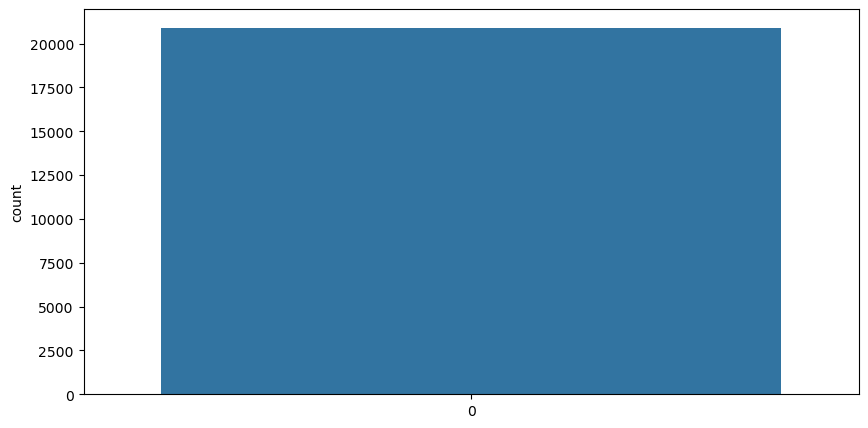

In [33]:
plt.figure(figsize = (10, 5))
sns.countplot(newdata["rating"])

In [34]:
newdata.describe(include = "all")

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
count,20915,20915,20915,20915,20915,20915,17532,20915.000000,20516,20903,20809,8916,20892,20817,20915,20915,20915,20915,16391
unique,8792,11495,927,20915,2,2,61,NaN,11999,93,93,4502,2630,70,12660,3693,7,30,3
top,Cafe Coffee Day,Delivery Only,"[Delivery, Dine-out]",https://www.zomato.com/bangalore/feeltheroll-b...,Yes,No,3.9/5,NaN,080 43334333,Whitefield,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM,1
freq,78,36,2418,1,11605,18615,1181,NaN,93,1462,8007,78,1174,3005,3524,16766,9355,2379,11321
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.105427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.954538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
newdata['reviews_list'][0]

'[(\'Rated 5.0\', "RATED\\n  Had an egg chicken roll and a paneer roll... Really yummy... A must visit place... It would be good if you guys can keep the shop open on Sunday\'s as well.. Good luck... :-)"), (\'Rated 5.0\', \'RATED\\n  Not just the Roll but the filling tastes great. I would highly recommend to others to try their rolls. Owners hospitality is also good and very friendly.\'), (\'Rated 4.5\', \'RATED\\n  Very nice place complete value for money ? Highly recommend.Must visit for any foodie . I would recommend the egg chicken roll . #feeltheroll\'), (\'Rated 5.0\', \'RATED\\n  Had an amazing mouth-watering ?chicken roll?Worth every bite..A must try for every foodie?A variety of rolls and sandwiches are available as well .. A budding rafflesia ?\')]'

In [36]:
rev=newdata['reviews_list'][0].lower()
rev

'[(\'rated 5.0\', "rated\\n  had an egg chicken roll and a paneer roll... really yummy... a must visit place... it would be good if you guys can keep the shop open on sunday\'s as well.. good luck... :-)"), (\'rated 5.0\', \'rated\\n  not just the roll but the filling tastes great. i would highly recommend to others to try their rolls. owners hospitality is also good and very friendly.\'), (\'rated 4.5\', \'rated\\n  very nice place complete value for money ? highly recommend.must visit for any foodie . i would recommend the egg chicken roll . #feeltheroll\'), (\'rated 5.0\', \'rated\\n  had an amazing mouth-watering ?chicken roll?worth every bite..a must try for every foodie?a variety of rolls and sandwiches are available as well .. a budding rafflesia ?\')]'

In [37]:
import re
rev2=re.sub('[^a-zA-Z]', ' ',rev)
rev2

'   rated        rated n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck             rated        rated n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly       rated        rated n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll      rated        rated n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [38]:
rev3=re.sub('rated', ' ',rev2)
rev3

'              n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck                        n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly                  n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll                 n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [39]:
rev4=re.sub('x',' ',rev3)
rev4

'              n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck                        n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly                  n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll                 n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [40]:
rev5=re.sub(' +',' ',rev4)
rev5

' n had an egg chicken roll and a paneer roll really yummy a must visit place it would be good if you guys can keep the shop open on sunday s as well good luck n not just the roll but the filling tastes great i would highly recommend to others to try their rolls owners hospitality is also good and very friendly n very nice place complete value for money highly recommend must visit for any foodie i would recommend the egg chicken roll feeltheroll n had an amazing mouth watering chicken roll worth every bite a must try for every foodie a variety of rolls and sandwiches are available as well a budding rafflesia '

In [41]:
newdata.shape

(20915, 19)

In [42]:
sample=newdata.sample(n=2000)

In [43]:
total_review=' '
for review in sample['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)

In [44]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [45]:
stopwords=set(STOPWORDS)

(-0.5, 799.5, 799.5, -0.5)

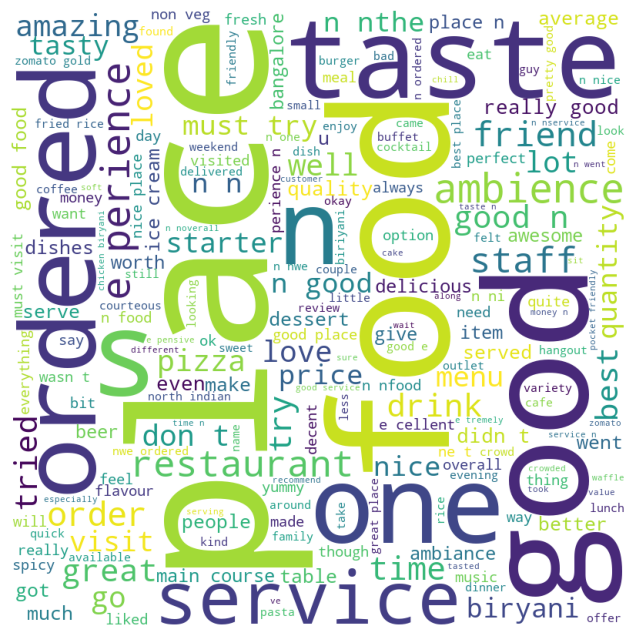

In [46]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

In [47]:
from nltk.corpus import RegexpTokenizer as regextoken

In [50]:
# Converting all the text to lowercase
newdata["reviews_list"] = newdata["reviews_list"].apply(lambda x: x.lower())

'''
def apply_lower(x):
    return x.lower()
 newdata["reviews_list"] = newdata["reviews_list"].apply(apply_lower)'''
   

'\ndef apply_lower(x):\n    return x.lower()\n newdata["reviews_list"] = newdata["reviews_list"].apply(apply_lower)'

In [51]:
tokenizer = regextoken("[a-zA-Z]+")

In [52]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [53]:
newdata["reviews_list"][0]

'[(\'rated 5.0\', "rated\\n  had an egg chicken roll and a paneer roll... really yummy... a must visit place... it would be good if you guys can keep the shop open on sunday\'s as well.. good luck... :-)"), (\'rated 5.0\', \'rated\\n  not just the roll but the filling tastes great. i would highly recommend to others to try their rolls. owners hospitality is also good and very friendly.\'), (\'rated 4.5\', \'rated\\n  very nice place complete value for money ? highly recommend.must visit for any foodie . i would recommend the egg chicken roll . #feeltheroll\'), (\'rated 5.0\', \'rated\\n  had an amazing mouth-watering ?chicken roll?worth every bite..a must try for every foodie?a variety of rolls and sandwiches are available as well .. a budding rafflesia ?\')]'

In [54]:
print(tokenizer.tokenize(newdata["reviews_list"][0]))

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [55]:
review_tokens = newdata["reviews_list"].apply(tokenizer.tokenize)

In [56]:
print(review_tokens[0])

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [59]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [62]:
from nltk.corpus import stopwords


In [67]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rabhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [68]:
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [69]:
stop.extend(["rated", "n", "nan", "x"])

In [70]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
rev=review_tokens[0]
print(rev)

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [72]:
print([token for token in rev if token not in stop])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


In [ ]:
def remove_stopwords(text):
    updated_text=[token for token in text if token not in stop]
    return updated_text

In [ ]:
review_tokens=review_tokens.apply(remove_stopwords)

In [75]:
type(review_tokens)

pandas.core.series.Series

In [76]:
print(review_tokens[0])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


In [77]:
print(review_tokens[1])

['little', 'cafe', 'set', 'beautiful', 'location', 'ambiance', 'good', 'nthe', 'burger', 'filled', 'taste', 'chicken', 'nthe', 'banana', 'chocolate', 'sandwich', 'variety', 'would', 'never', 'find', 'restaurants', 'bangalore', 'drinks', 'wonderful', 'lot', 'flavours', 'choose', 'nit', 'took', 'little', 'time', 'expected', 'food', 'served', 'table', 'nall', 'dishes', 'seemed', 'priced', 'moderately', 'well', 'nfood', 'nambiance', 'nservice', 'ntheir', 'chefs', 'brilliant', 'job', 'creating', 'new', 'dishes', 'variety', 'na', 'wonderful', 'place', 'friends', 'cozy', 'cafe', 'near', 'silk', 'board', 'came', 'boarding', 'bus', 'totally', 'open', 'air', 'especially', 'comfortable', 'night', 'staff', 'friendly', 'serve', 'food', 'fast', 'quite', 'cheap', 'good', 'bite', 'ncons', 'come', 'weather', 'good', 'toilets', 'lights', 'ni', 'recommend', 'beetroot', 'juice', 'nice', 'place', 'hang', 'open', 'space', 'must', 'visit', 'place', 'night', 'looks', 'awesome', 'food', 'items', 'tasty', 'frie

In [78]:
len(review_tokens)

20915

In [79]:
all_reviews = review_tokens.astype(str).str.cat()

In [80]:
all_reviews[0:200]

"['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes'"

In [81]:
type(all_reviews)

str

In [82]:
len(all_reviews)

129341038

In [83]:
cleaned_reviews = tokenizer.tokenize(all_reviews)

In [84]:
len(cleaned_reviews)

13376224

In [85]:
type(cleaned_reviews)

list

In [86]:
print(cleaned_reviews[0:200])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia', 'little', 'cafe', 'set', 'beautiful', 'location', 'ambiance', 'good', 'nthe', 'burger', 'filled', 'taste', 'chicken', 'nthe', 'banana', 'chocolate', 'sandwich', 'variety', 'would', 'never', 'find', 'restaurants', 'bangalore', 'drinks', 'wonderful', 'lot', 'flavours', 'choose', 'nit', 'took', 'little', 'time', 'expected', 'food

In [87]:
from nltk import FreqDist, bigrams, trigrams


In [88]:
fd = FreqDist()

In [89]:
for word in cleaned_reviews:
    fd[word]=fd[word]+ 1

In [90]:
fd.most_common(5)

[('good', 328304),
 ('place', 317915),
 ('food', 307405),
 ('chicken', 141301),
 ('service', 109512)]

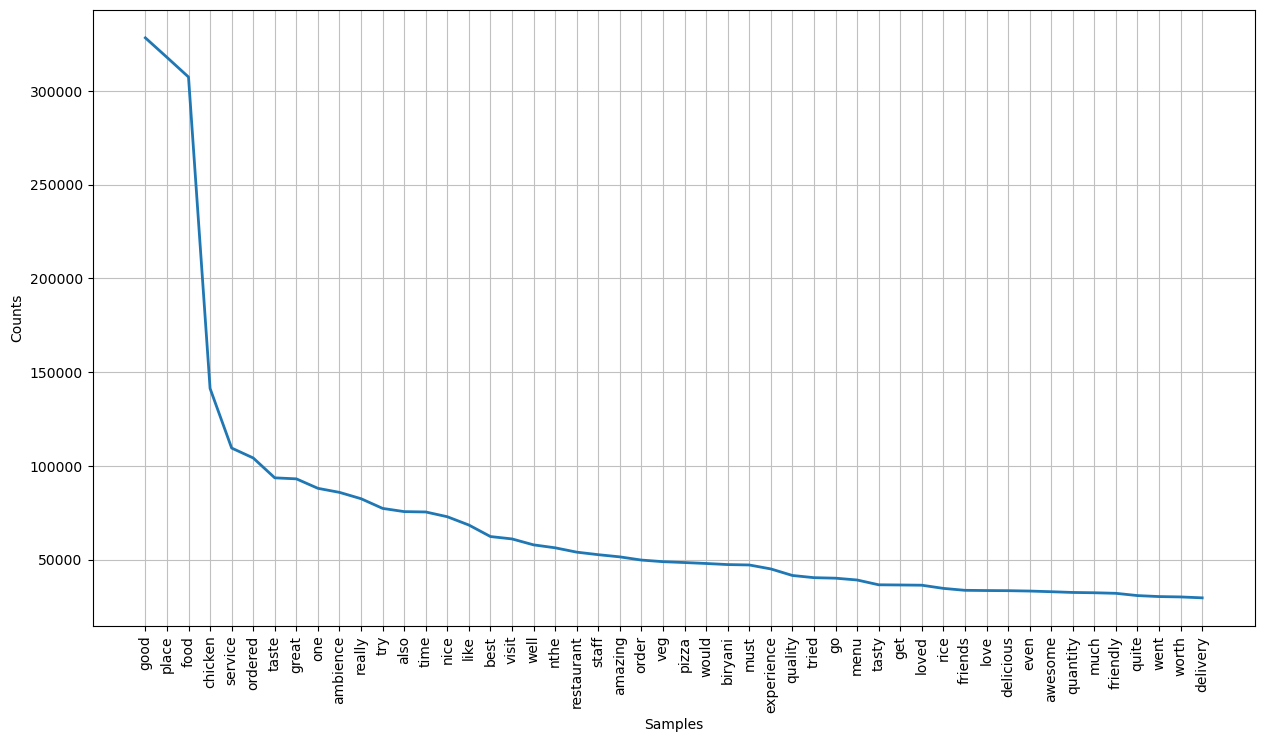

<Axes: xlabel='Samples', ylabel='Counts'>

In [91]:
plt.figure(figsize = (15, 8))
fd.plot(50)

In [92]:
from nltk import bigrams

In [93]:
bigrams = bigrams(cleaned_reviews)

In [94]:
bigrams

<generator object bigrams at 0x0000016923B42EA0>

In [95]:
fd_bigrams = FreqDist()
for bigram in bigrams:
    fd_bigrams[bigram]=fd_bigrams[bigram] + 1
    
# Examining the top 5 most frequent bigrams
fd_bigrams.most_common(5)

[(('must', 'try'), 23182),
 (('really', 'good'), 22564),
 (('good', 'food'), 21589),
 (('food', 'good'), 21175),
 (('good', 'place'), 18690)]

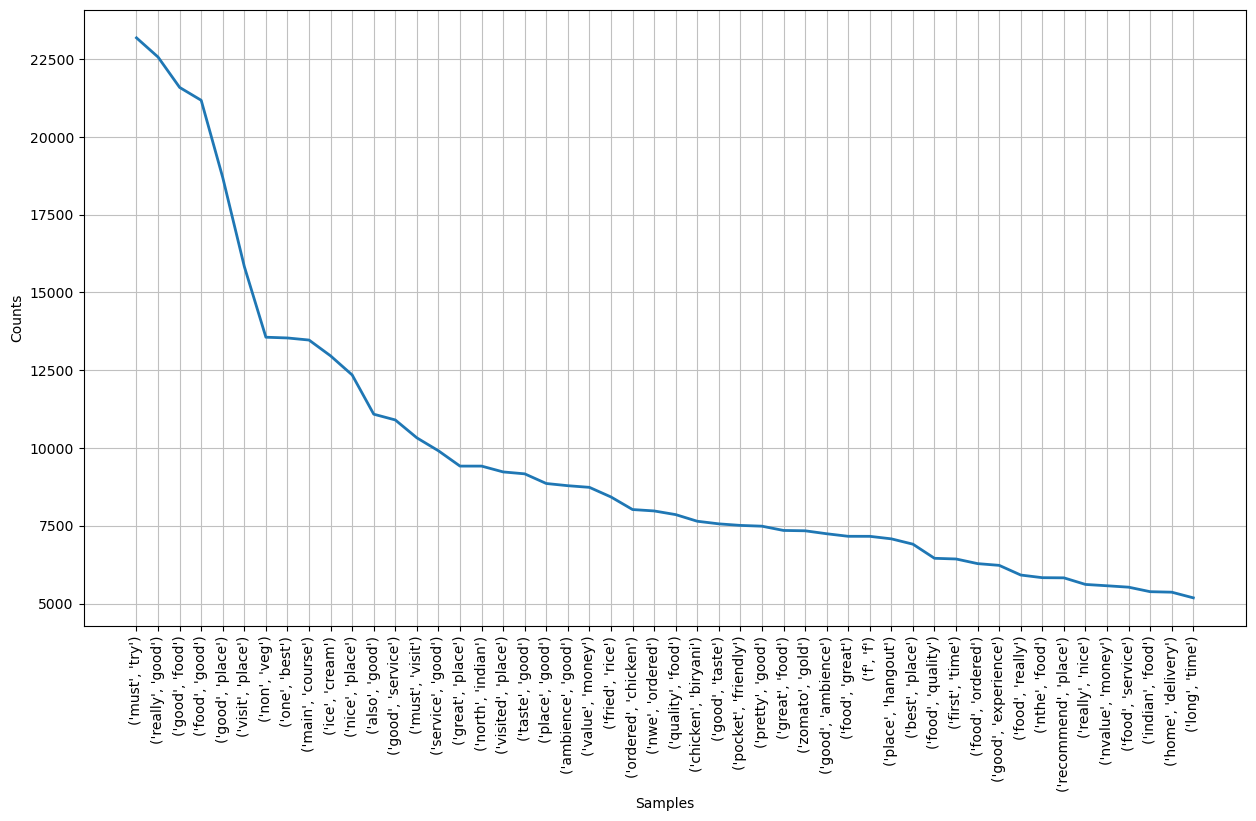

<Axes: xlabel='Samples', ylabel='Counts'>

In [96]:
plt.figure(figsize = (15, 8))
fd_bigrams.plot(50)

In [97]:
fd_bigrams.most_common(50)

[(('must', 'try'), 23182),
 (('really', 'good'), 22564),
 (('good', 'food'), 21589),
 (('food', 'good'), 21175),
 (('good', 'place'), 18690),
 (('visit', 'place'), 15832),
 (('non', 'veg'), 13561),
 (('one', 'best'), 13537),
 (('main', 'course'), 13470),
 (('ice', 'cream'), 12961),
 (('nice', 'place'), 12348),
 (('also', 'good'), 11087),
 (('good', 'service'), 10902),
 (('must', 'visit'), 10327),
 (('service', 'good'), 9911),
 (('great', 'place'), 9419),
 (('north', 'indian'), 9419),
 (('visited', 'place'), 9232),
 (('taste', 'good'), 9170),
 (('place', 'good'), 8860),
 (('ambience', 'good'), 8789),
 (('value', 'money'), 8736),
 (('fried', 'rice'), 8427),
 (('ordered', 'chicken'), 8023),
 (('nwe', 'ordered'), 7978),
 (('quality', 'food'), 7860),
 (('chicken', 'biryani'), 7647),
 (('good', 'taste'), 7563),
 (('pocket', 'friendly'), 7513),
 (('pretty', 'good'), 7488),
 (('great', 'food'), 7351),
 (('zomato', 'gold'), 7340),
 (('good', 'ambience'), 7245),
 (('food', 'great'), 7163),
 (('f

In [98]:
from nltk import trigrams

In [99]:
trigrams = trigrams(cleaned_reviews)

In [100]:
fd_trigrams = FreqDist()
for trigram in trigrams:
    fd_trigrams[trigram] += 1

In [101]:
fd_trigrams.most_common(5)

[(('must', 'visit', 'place'), 3982),
 (('f', 'f', 'f'), 3916),
 (('veg', 'non', 'veg'), 3734),
 (('north', 'indian', 'food'), 3433),
 (('place', 'hangout', 'friends'), 2824)]

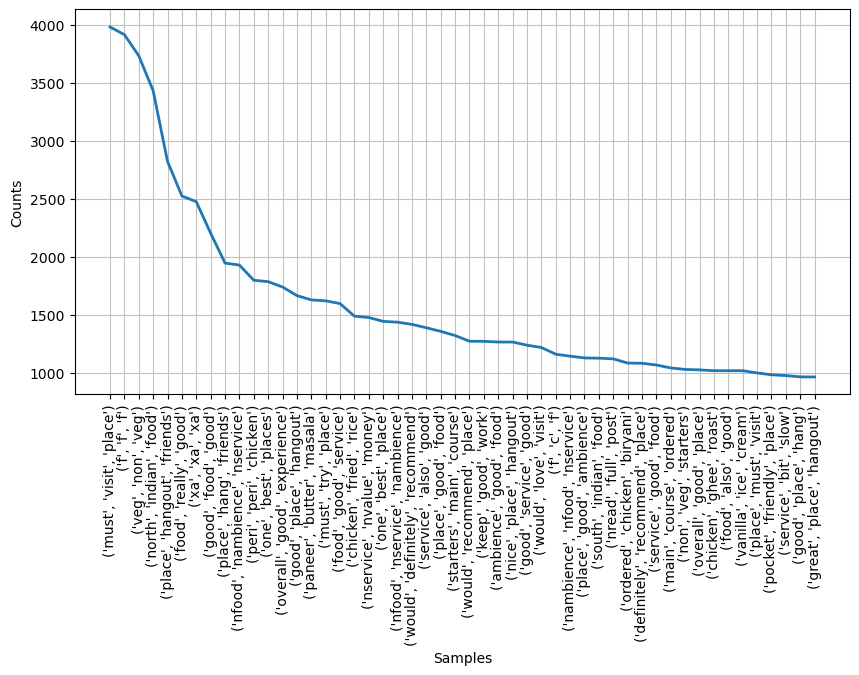

<Axes: xlabel='Samples', ylabel='Counts'>

In [102]:
plt.figure(figsize = (10, 5))
fd_trigrams.plot(50)

In [103]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('rated 5.0', ""rated\n had an egg chicken ro...",[],Delivery,Bellandur,1
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Delivery,BTM,1
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Dine-out,BTM,1
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Buffet,Electronic City,NaN
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Delivery,Electronic City,NaN


In [104]:
cuisines = newdata[["cuisines", "rating"]]


In [105]:
cuisines.isnull().sum()

cuisines      23
rating      4524
dtype: int64

In [106]:
cuisines.dropna(inplace=True)

In [107]:
# Converting to lowercase
cuisines["cuisines"] = cuisines["cuisines"].apply(lambda x: x.lower())

# Tokenizing the cuisines
cuisine_tokens = cuisines["cuisines"].apply(tokenizer.tokenize)

In [108]:
cuisine_tokens[0]

['fast', 'food']

In [109]:
type(cuisine_tokens[0])

list

In [110]:
type(cuisine_tokens)

pandas.core.series.Series

In [111]:
# Concatenating all the cuisine names into one text document
all_cuisines = cuisine_tokens.astype(str).str.cat()

In [112]:
type(all_cuisines)

str

In [113]:
all_cuisines[0:50]

"['fast', 'food']['fast', 'food', 'beverages']['fas"

In [114]:
cleaned_cuisines = tokenizer.tokenize(all_cuisines)

In [115]:
type(cleaned_cuisines)

list

In [116]:
# Generating cuisine frequencies 
fd_cuisine = FreqDist()
for cuisine in cleaned_cuisines:
    fd_cuisine[cuisine] += 1
    
# Printing the 50 most common cuisines (top 50)
print(fd_cuisine.most_common(5))

[('indian', 9622), ('north', 6941), ('chinese', 5143), ('food', 4239), ('south', 2650)]


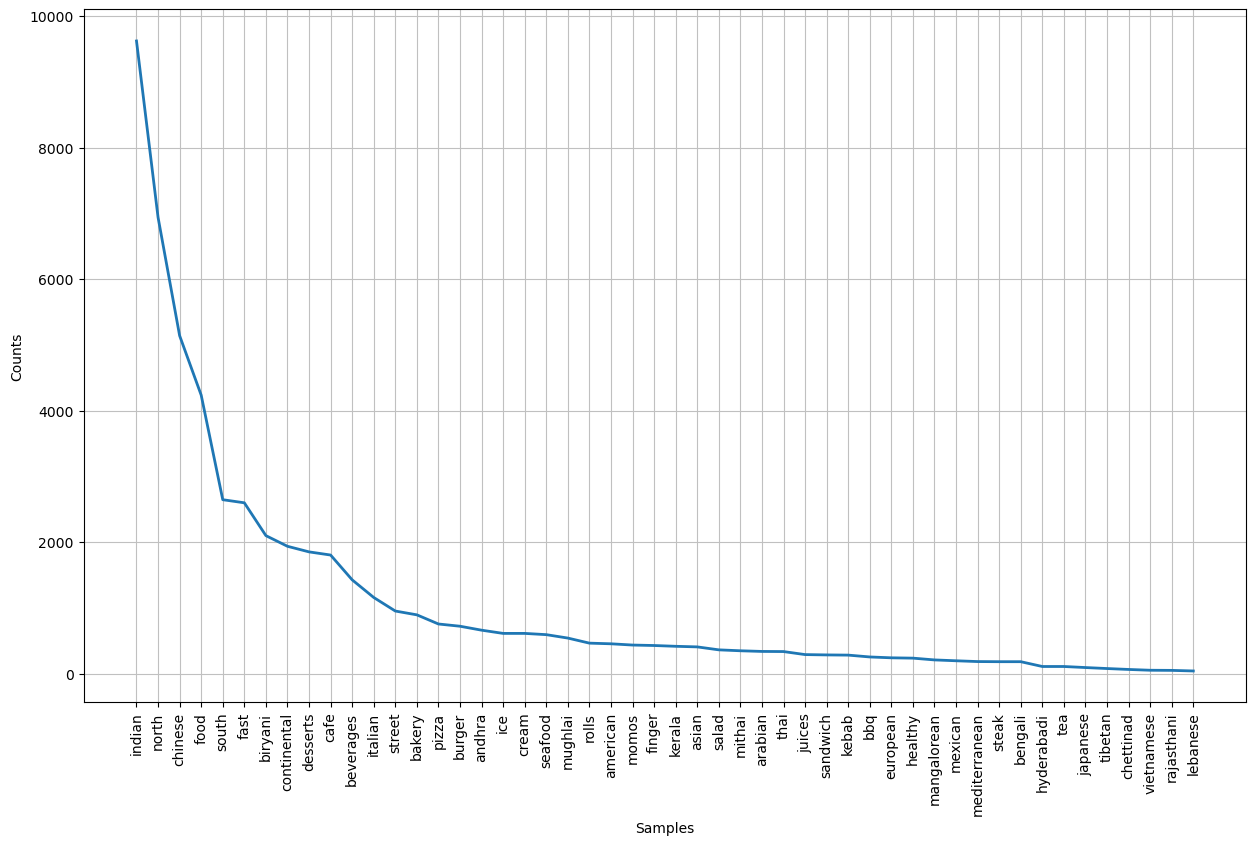

<Axes: xlabel='Samples', ylabel='Counts'>

In [117]:
plt.figure(figsize=(15,9))
fd_cuisine.plot(50)

In [118]:
newdata.columns

Index(['name', 'address', 'listed_in(type)_x', 'url', 'online_order',
       'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)_y', 'listed_in(city)', 'rating'],
      dtype='object')

In [119]:
newdata.dtypes

name                             object
address                          object
listed_in(type)_x                object
url                              object
online_order                     object
book_table                       object
rate                             object
votes                             int64
phone                            object
location                         object
rest_type                        object
dish_liked                       object
cuisines                         object
approx_cost(for two people)      object
reviews_list                     object
menu_item                        object
listed_in(type)_y                object
listed_in(city)                  object
rating                         category
dtype: object

In [120]:
# Converting all the text to strings

newdata[["reviews_list", "menu_item", "dish_liked", "cuisines"]] = newdata[["reviews_list", "menu_item", "dish_liked", "cuisines"]].astype("str")

# Combining all the text data into a single feature called "text"
newdata["text"] = newdata["reviews_list"] + " " + newdata["menu_item"] + " " + newdata["dish_liked"] + " " + newdata["cuisines"]

In [121]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating,text
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,nan,Fast Food,200,"[('rated 5.0', ""rated\n had an egg chicken ro...",[],Delivery,Bellandur,1,"[('rated 5.0', ""rated\n had an egg chicken ro..."
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Delivery,BTM,1,"[('rated 4.0', 'rated\n this little cafe is s..."
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Dine-out,BTM,1,"[('rated 4.0', 'rated\n this little cafe is s..."
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,nan,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Buffet,Electronic City,NaN,"[('rated 5.0', ""rated\n great service and don..."
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,nan,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Delivery,Electronic City,NaN,"[('rated 5.0', ""rated\n great service and don..."


In [122]:
text_data = newdata[["text", "rating"]]

In [123]:
text_data.head()

,text,rating
0,"[('rated 5.0', ""rated\n had an egg chicken ro...",1
1,"[('rated 4.0', 'rated\n this little cafe is s...",1
2,"[('rated 4.0', 'rated\n this little cafe is s...",1
3,"[('rated 5.0', ""rated\n great service and don...",NaN
4,"[('rated 5.0', ""rated\n great service and don...",NaN


In [124]:
text_data['rating'].unique()

['1', NaN, '0', '2']
Categories (3, object): ['0' < '1' < '2']

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le=LabelEncoder()

In [127]:
text_data.dropna(inplace=True)

In [128]:
text_data['rating']=le.fit_transform(text_data['rating'])

In [129]:
text_data['rating'].unique()

array([1, 0, 2])

In [130]:
text_data['rating'].dtype

dtype('int32')

In [131]:
text_data["text"] = text_data["text"].apply(lambda x: x.lower())


In [132]:
text_data.shape

(16391, 2)

In [133]:
df=text_data.sample(n=2000)

In [134]:
df.reset_index(inplace=True)

In [135]:
df.drop('index',axis=1,inplace=True)

In [136]:
df.head()

,text,rating
0,"[('rated 4.0', 'rated\n the fish thali is def...",1
1,"[('rated 3.0', 'rated\n they have limited ite...",1
2,"[('rated 4.0', 'rated\n what seemed like a bo...",1
3,"[('rated 4.0', 'rated\n being a bong, having ...",2
4,"[('rated 5.0', 'rated\n rolls were awesome.')...",0


In [137]:
df.isnull().sum()

text      0
rating    0
dtype: int64

In [138]:
df.dropna(inplace=True)

In [139]:
df.shape

(2000, 2)

In [140]:
tokens = df["text"].apply(tokenizer.tokenize) 

In [141]:
type(tokens)

pandas.core.series.Series

In [142]:
print(tokens[0])

['rated', 'rated', 'n', 'the', 'fish', 'thali', 'is', 'definitely', 'something', 'to', 'try', 'out', 'here', 'loved', 'the', 'spread', 'especially', 'the', 'fish', 'curry', 'which', 'goes', 'well', 'with', 'the', 'boiled', 'rice', 'nthe', 'prawns', 'and', 'squid', 'roast', 'are', 'the', 'best', 'dishes', 'here', 'you', 'definitely', 'have', 'to', 'order', 'them', 'ncoming', 'to', 'the', 'ambience', 'very', 'well', 'done', 'nambience', 'nfood', 'nwould', 'definitely', 'visit', 'this', 'place', 'again', 'rated', 'rated', 'n', 'have', 'visited', 'their', 'old', 'venue', 'in', 'the', 'old', 'complex', 'on', 'mg', 'road', 'the', 'staircase', 'was', 'very', 'dirty', 'and', 'there', 'was', 'no', 'ambience', 'absolutely', 'nwe', 'used', 'to', 'order', 'for', 'neer', 'dosa', 'and', 'chicken', 'ghee', 'roast', 'anjal', 'fry', 'and', 'fish', 'thalis', 'the', 'neer', 'dosa', 'and', 'ghee', 'roast', 'combination', 'was', 'really', 'good', 'and', 'the', 'anjal', 'fry', 'dish', 'was', 'awesome', 'rat

In [143]:
len(tokens)

2000

In [144]:
tokens = tokens.apply(lambda x: [token for token in x if token not in stop])

In [145]:
from nltk.stem import WordNetLemmatizer

In [146]:
wl = WordNetLemmatizer()

In [147]:
print(tokens[0])

['fish', 'thali', 'definitely', 'something', 'try', 'loved', 'spread', 'especially', 'fish', 'curry', 'goes', 'well', 'boiled', 'rice', 'nthe', 'prawns', 'squid', 'roast', 'best', 'dishes', 'definitely', 'order', 'ncoming', 'ambience', 'well', 'done', 'nambience', 'nfood', 'nwould', 'definitely', 'visit', 'place', 'visited', 'old', 'venue', 'old', 'complex', 'mg', 'road', 'staircase', 'dirty', 'ambience', 'absolutely', 'nwe', 'used', 'order', 'neer', 'dosa', 'chicken', 'ghee', 'roast', 'anjal', 'fry', 'fish', 'thalis', 'neer', 'dosa', 'ghee', 'roast', 'combination', 'really', 'good', 'anjal', 'fry', 'dish', 'awesome', 'place', 'go', 'sea', 'food', 'manglorean', 'cuisine', 'moved', 'new', 'location', 'place', 'looks', 'much', 'better', 'always', 'end', 'chicken', 'ghee', 'roast', 'neer', 'dosa', 'time', 'also', 'tried', 'ghee', 'roast', 'prawns', 'rava', 'fried', 'prawns', 'usual', 'delish', 'love', 'food', 'never', 'disappoints', 'alcohol', 'well', 'thats', 'added', 'bonus', 'service',

In [148]:
data=tokens[0]

In [150]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rabhi\AppData\Roaming\nltk_data...


True

In [152]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rabhi\AppData\Roaming\nltk_data...


True

In [153]:
print([wl.lemmatize(word) for word in data])

['fish', 'thali', 'definitely', 'something', 'try', 'loved', 'spread', 'especially', 'fish', 'curry', 'go', 'well', 'boiled', 'rice', 'nthe', 'prawn', 'squid', 'roast', 'best', 'dish', 'definitely', 'order', 'ncoming', 'ambience', 'well', 'done', 'nambience', 'nfood', 'nwould', 'definitely', 'visit', 'place', 'visited', 'old', 'venue', 'old', 'complex', 'mg', 'road', 'staircase', 'dirty', 'ambience', 'absolutely', 'nwe', 'used', 'order', 'neer', 'dosa', 'chicken', 'ghee', 'roast', 'anjal', 'fry', 'fish', 'thalis', 'neer', 'dosa', 'ghee', 'roast', 'combination', 'really', 'good', 'anjal', 'fry', 'dish', 'awesome', 'place', 'go', 'sea', 'food', 'manglorean', 'cuisine', 'moved', 'new', 'location', 'place', 'look', 'much', 'better', 'always', 'end', 'chicken', 'ghee', 'roast', 'neer', 'dosa', 'time', 'also', 'tried', 'ghee', 'roast', 'prawn', 'rava', 'fried', 'prawn', 'usual', 'delish', 'love', 'food', 'never', 'disappoints', 'alcohol', 'well', 'thats', 'added', 'bonus', 'service', 'mark',

In [154]:
df['rating'].unique()

array([1, 2, 0])

In [155]:
df['rating'].dtype

dtype('int32')

In [156]:
df['rating'].value_counts()

1    1379
0     351
2     270
Name: rating, dtype: int64

In [157]:
def lem(text):
    return [wl.lemmatize(word) for word in text]

In [158]:
tokens_new = tokens.apply(lem)

In [159]:
type(tokens_new)

pandas.core.series.Series

In [160]:
tokens_new.head()

0    [fish, thali, definitely, something, try, love...
1    [limited, item, order, however, chicken, kosha...
2    [seemed, like, boring, evening, turned, amazin...
3    [bong, nolen, gur, stuff, made, like, traditio...
4    [roll, awesome, worst, fried, rice, yet, roll,...
Name: text, dtype: object

In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
le=LabelEncoder()

In [163]:
df['rating']=le.fit_transform(df['rating'])

In [164]:
print(tokens_new[0])

['fish', 'thali', 'definitely', 'something', 'try', 'loved', 'spread', 'especially', 'fish', 'curry', 'go', 'well', 'boiled', 'rice', 'nthe', 'prawn', 'squid', 'roast', 'best', 'dish', 'definitely', 'order', 'ncoming', 'ambience', 'well', 'done', 'nambience', 'nfood', 'nwould', 'definitely', 'visit', 'place', 'visited', 'old', 'venue', 'old', 'complex', 'mg', 'road', 'staircase', 'dirty', 'ambience', 'absolutely', 'nwe', 'used', 'order', 'neer', 'dosa', 'chicken', 'ghee', 'roast', 'anjal', 'fry', 'fish', 'thalis', 'neer', 'dosa', 'ghee', 'roast', 'combination', 'really', 'good', 'anjal', 'fry', 'dish', 'awesome', 'place', 'go', 'sea', 'food', 'manglorean', 'cuisine', 'moved', 'new', 'location', 'place', 'look', 'much', 'better', 'always', 'end', 'chicken', 'ghee', 'roast', 'neer', 'dosa', 'time', 'also', 'tried', 'ghee', 'roast', 'prawn', 'rava', 'fried', 'prawn', 'usual', 'delish', 'love', 'food', 'never', 'disappoints', 'alcohol', 'well', 'thats', 'added', 'bonus', 'service', 'mark',

In [165]:
' '.join(tokens_new[0])

'fish thali definitely something try loved spread especially fish curry go well boiled rice nthe prawn squid roast best dish definitely order ncoming ambience well done nambience nfood nwould definitely visit place visited old venue old complex mg road staircase dirty ambience absolutely nwe used order neer dosa chicken ghee roast anjal fry fish thalis neer dosa ghee roast combination really good anjal fry dish awesome place go sea food manglorean cuisine moved new location place look much better always end chicken ghee roast neer dosa time also tried ghee roast prawn rava fried prawn usual delish love food never disappoints alcohol well thats added bonus service mark waiting staff attentive nice lunch best place mangalorean cuisine must try food especially spice lover chicken ghee roast neer dosa nand kori roti chicken curry place time favourite favourite sucker chicken ghee roast along neer dosa regular customer month visit must try daal khichdi pomfret masala ghee roast sure prwans 

In [166]:
tokens_new.index

RangeIndex(start=0, stop=2000, step=1)

In [167]:
corpus=[]

for i in tokens_new.index:
    review=' '.join(tokens_new[i])
    corpus.append(review)

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [169]:
X.shape

(2000, 25884)

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
# Splitting the data into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, df['rating'], test_size = 0.3, random_state = 0,stratify=df['rating'])

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
lr=LogisticRegression(multi_class='multinomial')

In [174]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [175]:
predictions =lr.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions, y_test))

[[  8   1   0]
 [ 97 406  52]
 [  0   7  29]]


In [177]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y_test))
print('\n')

0.7383333333333333




In [178]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [179]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [180]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[  8   1   0]
 [ 97 406  52]
 [  0   7  29]]
0.7383333333333333


Naive Bayes
[[ 28  55   1]
 [ 67 271  40]
 [ 10  88  40]]
0.565


RandomForest
[[  7   1   0]
 [ 97 405  51]
 [  1   8  30]]
0.7366666666666667


Decision Tree
[[ 29  50   6]
 [ 75 331  29]
 [  1  33  46]]
0.6766666666666666


KNN
[[ 12  17   1]
 [ 89 358  37]
 [  4  39  43]]
0.6883333333333334




In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
lr = LogisticRegression()
print(cross_val_score(lr, X, df['rating'], cv=5, scoring ='accuracy').mean())

0.745
